# top30cat

Remove non-cast/non-cast from dataframe

Top 30 pairings according to total works in which they are mentioned

Remove row non-cast/non-cast from frequency consideration

Frequency

 - remove non-cast/non-cast from dataset
 
 - select Top 30 slashpairs
 
 - Compute this table for raing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import ds9
df = ds9.df()

## Turn list into rows of a dataframe

In [2]:
df = ds9.keepcolumns(df, 'relationshipspairslash', 'rating', 'categories', 'warnings')
df = ds9.explode(df, 'relationshipspairslash')

## Remove non-cast/non-cast from dataframe

In [3]:
index = df[df['relationshipspairslash'] == 'non-cast/non-cast'].index
df.drop(index, inplace=True)

## Find top-30 pairs

In [4]:
freq_df = df['relationshipspairslash'].value_counts()
freq_list = list(freq_df.index)
top30_list = freq_list[0:30]

## Create dataframe of only top-30 pairs

In [5]:
top30_df = pd.DataFrame()
for index, row in df.iterrows():
    if row['relationshipspairslash'] in top30_list:
        r = df[df.index == index].copy()
        top30_df = pd.concat([top30_df, r], ignore_index=True)

# Convert to a category
relationshipspairslash_type = ds9.strtotype(top30_df,'relationshipspairslash')
top30_df['relationshipspairslash'] = top30_df['relationshipspairslash'].astype(relationshipspairslash_type)

## Cross tabulate with rating

In [6]:
# Crosstabulate
crosstab_relationshipspairslash_rating = pd.crosstab(index = top30_df.relationshipspairslash,
                                                           columns = top30_df.rating,
                                                           margins=True,
                                                           margins_name = 'Total')

# Save .CSV
crosstab_relationshipspairslash_rating.to_csv('top30cat-relationshipspairslash-rating.csv')

# Display table
crosstab_relationshipspairslash_rating

rating,General Audiences,Teen And Up Audiences,Mature,Explicit,Not Rated,Total
relationshipspairslash,,,,,,
Elim Garak/Julian Bashir,1096,1238,588,751,139,3812
Jadzia Dax/Kira Nerys,159,158,35,35,7,394
Odo/Quark,94,144,47,80,7,372
Kira Nerys/Odo,100,85,23,25,11,244
Jadzia Dax/Worf,64,46,10,14,10,144
Julian Bashir/non-cast,31,34,38,36,4,143
Keiko O'Brien/Miles O'Brien,38,60,10,12,5,125
Corat Damar/Weyoun,13,37,21,51,2,124
Elim Garak/Kelas Parmak,38,32,23,23,2,118


### As percent

In [7]:
# Crosstabulate
crosstab_relationshipspairslash_rating_percent = pd.crosstab(index = top30_df.relationshipspairslash,
                                                           columns = top30_df.rating,
                                                           margins=True,
                                                           margins_name = 'Average (of top 30)',
                                                           normalize = 'index').round(3)*100

# Save .CSV
crosstab_relationshipspairslash_rating_percent.to_csv('top30cat-relationshipspairslash-rating-percent.csv')

# Display table
crosstab_relationshipspairslash_rating_percent

rating,General Audiences,Teen And Up Audiences,Mature,Explicit,Not Rated
relationshipspairslash,,,,,
Elim Garak/Julian Bashir,28.8,32.5,15.4,19.7,3.6
Jadzia Dax/Kira Nerys,40.4,40.1,8.9,8.9,1.8
Odo/Quark,25.3,38.7,12.6,21.5,1.9
Kira Nerys/Odo,41.0,34.8,9.4,10.2,4.5
Jadzia Dax/Worf,44.4,31.9,6.9,9.7,6.9
Julian Bashir/non-cast,21.7,23.8,26.6,25.2,2.8
Keiko O'Brien/Miles O'Brien,30.4,48.0,8.0,9.6,4.0
Corat Damar/Weyoun,10.5,29.8,16.9,41.1,1.6
Elim Garak/Kelas Parmak,32.2,27.1,19.5,19.5,1.7


### As percent heatmap

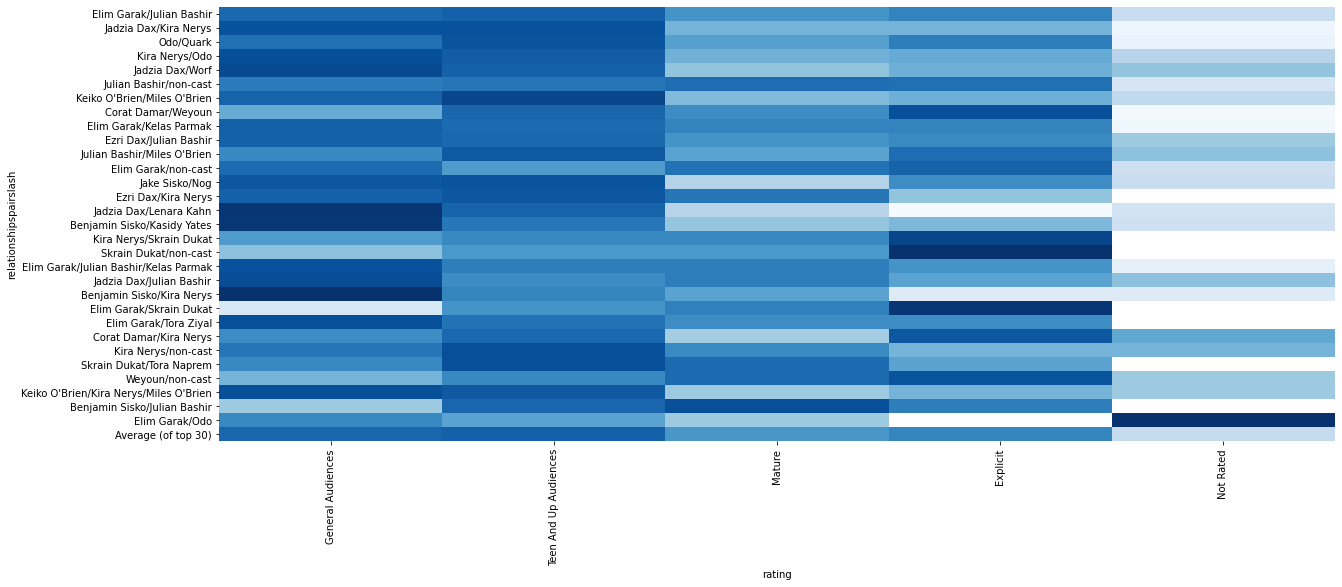

In [8]:
fig, ax = plt.subplots(figsize = (20,8))
cmap = sns.color_palette('Blues', n_colors=100)
hm = sns.heatmap(data=crosstab_relationshipspairslash_rating_percent, vmin=0, vmax=2, norm=LogNorm(), cmap=cmap, cbar=False)
fig = hm.get_figure()
plt.xticks(rotation=90)
fig.savefig('top30cat-relationshipspairslash-rating-heatmap.pdf', orientation='landscape')
fig.savefig('top30cat-relationshipspairslash-rating-heatmap.png')
fig.savefig('top30cat-relationshipspairslash-rating-heatmap.svg')
plt.show()

## Cross tabulate with categories

In [9]:
# Explode categories
# Use `cat_df` as we don't want to damage `df`
cat_df = ds9.explode(top30_df, 'categories')
cat_df['categories'] = cat_df['categories'].astype(ds9.categories_type)

# Cross-tabulate
crosstab_relationshipspairslash_categories = pd.crosstab(index = cat_df.relationshipspairslash,
                                                         columns = cat_df.categories,
                                                         margins = True,
                                                         margins_name = 'Total')
# Save .CSV
crosstab_relationshipspairslash_categories.to_csv('top30cat-relationshipspairslash-categories.csv')

# Display table
crosstab_relationshipspairslash_categories

categories,M/M,Gen,F/M,F/F,Multi,No category,Other,Total
relationshipspairslash,,,,,,,,
Elim Garak/Julian Bashir,3525,315,197,76,127,104,51,4395
Jadzia Dax/Kira Nerys,45,37,23,366,13,2,4,490
Odo/Quark,338,37,26,11,25,3,14,454
Kira Nerys/Odo,42,76,178,18,25,10,31,380
Jadzia Dax/Worf,45,40,92,16,22,5,2,222
Julian Bashir/non-cast,109,15,40,11,13,5,12,205
Keiko O'Brien/Miles O'Brien,58,45,73,20,28,0,3,227
Corat Damar/Weyoun,118,12,6,7,8,0,30,181
Elim Garak/Kelas Parmak,85,12,7,7,15,1,33,160


### As percent

In [10]:
# Cross-tabulate
crosstab_relationshipspairslash_categories_percent = pd.crosstab(index = cat_df.relationshipspairslash,
                                                         columns = cat_df.categories,
                                                         margins = True,
                                                         margins_name = 'Total',
                                                         normalize = 'index').round(3)*100
# Save .CSV
crosstab_relationshipspairslash_categories_percent.to_csv('top30cat-relationshipspairslash-categories-percent.csv')

# Display table
crosstab_relationshipspairslash_categories_percent

categories,M/M,Gen,F/M,F/F,Multi,No category,Other
relationshipspairslash,,,,,,,
Elim Garak/Julian Bashir,80.2,7.2,4.5,1.7,2.9,2.4,1.2
Jadzia Dax/Kira Nerys,9.2,7.6,4.7,74.7,2.7,0.4,0.8
Odo/Quark,74.4,8.1,5.7,2.4,5.5,0.7,3.1
Kira Nerys/Odo,11.1,20.0,46.8,4.7,6.6,2.6,8.2
Jadzia Dax/Worf,20.3,18.0,41.4,7.2,9.9,2.3,0.9
Julian Bashir/non-cast,53.2,7.3,19.5,5.4,6.3,2.4,5.9
Keiko O'Brien/Miles O'Brien,25.6,19.8,32.2,8.8,12.3,0.0,1.3
Corat Damar/Weyoun,65.2,6.6,3.3,3.9,4.4,0.0,16.6
Elim Garak/Kelas Parmak,53.1,7.5,4.4,4.4,9.4,0.6,20.6


### As percent heatmap

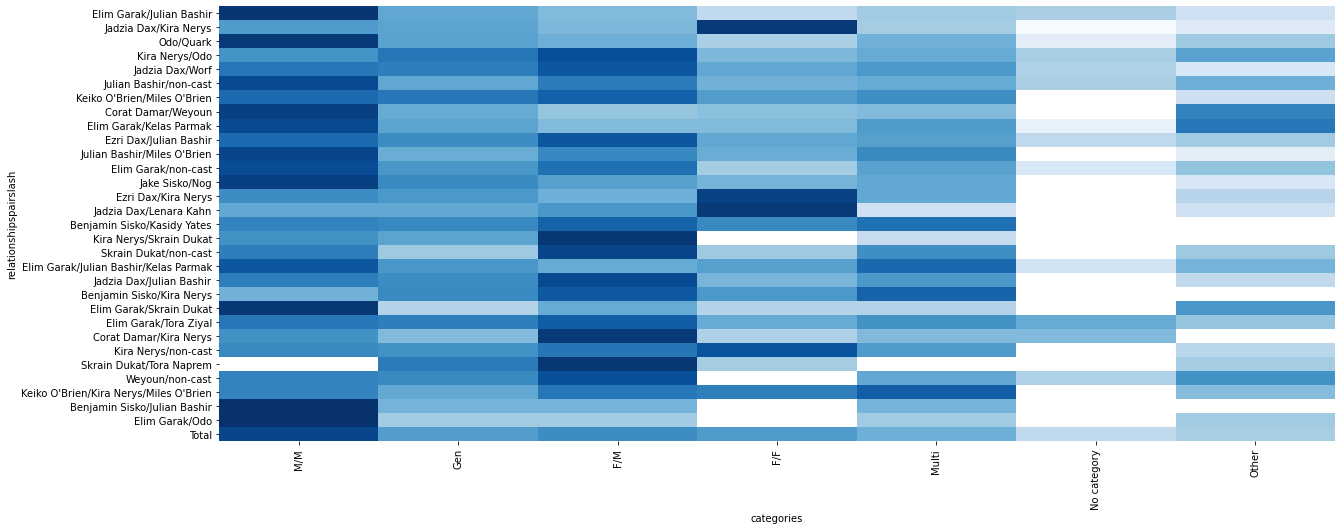

In [11]:
fig, ax = plt.subplots(figsize = (20,8))
cmap = sns.color_palette('Blues', n_colors=100)
hm = sns.heatmap(data=crosstab_relationshipspairslash_categories_percent, vmin=0, vmax=2, norm=LogNorm(), cmap=cmap, cbar=False)
fig = hm.get_figure()
plt.xticks(rotation=90)
fig.savefig('top30cat-relationshipspairslash-categories-heatmap.pdf', orientation='landscape')
fig.savefig('top30cat-relationshipspairslash-categories-heatmap.png')
fig.savefig('top30cat-relationshipspairslash-categories-heatmap.svg')
plt.show()

## Cross tabulate with warnings

In [12]:
# Explode warnings
# Use `warn_df` as we don't want to damage `df`
warn_df = ds9.explode(top30_df, 'warnings')
warn_df['warnings'] = warn_df['warnings'].astype(ds9.warnings_type)

# Cross-tabulate
crosstab_relationshipspairslash_warnings = pd.crosstab(index = warn_df.relationshipspairslash,
                                                         columns = warn_df.warnings,
                                                         margins = True,
                                                         margins_name = 'Total')
# Save .CSV
crosstab_relationshipspairslash_warnings.to_csv('top30cat-relationshipspairslash-warnings.csv')

# Display table
crosstab_relationshipspairslash_warnings

warnings,No Archive Warnings Apply,Choose Not To Use Archive Warnings,Graphic Depictions Of Violence,Major Character Death,Rape/Non-Con,Underage,Total
relationshipspairslash,,,,,,,
Elim Garak/Julian Bashir,3041,654,74,52,52,6,3879
Jadzia Dax/Kira Nerys,338,49,1,15,1,0,404
Odo/Quark,320,46,3,6,2,0,377
Kira Nerys/Odo,159,77,6,8,3,0,253
Jadzia Dax/Worf,104,34,4,9,1,0,152
Julian Bashir/non-cast,98,28,9,6,9,0,150
Keiko O'Brien/Miles O'Brien,105,16,3,1,1,0,126
Corat Damar/Weyoun,83,27,5,5,8,0,128
Elim Garak/Kelas Parmak,97,16,2,3,1,1,120


### As percent

In [13]:
# Cross-tabulate
crosstab_relationshipspairslash_warnings_percent = pd.crosstab(index = warn_df.relationshipspairslash,
                                                               columns = warn_df.warnings,
                                                               margins = True,
                                                               margins_name = 'Total',
                                                              normalize = 'index').round(3)*100
# Save .CSV
crosstab_relationshipspairslash_warnings_percent.to_csv('top30cat-relationshipspairslash-warnings-percent.csv')

# Display table
crosstab_relationshipspairslash_warnings_percent

warnings,No Archive Warnings Apply,Choose Not To Use Archive Warnings,Graphic Depictions Of Violence,Major Character Death,Rape/Non-Con,Underage
relationshipspairslash,,,,,,
Elim Garak/Julian Bashir,78.4,16.9,1.9,1.3,1.3,0.2
Jadzia Dax/Kira Nerys,83.7,12.1,0.2,3.7,0.2,0.0
Odo/Quark,84.9,12.2,0.8,1.6,0.5,0.0
Kira Nerys/Odo,62.8,30.4,2.4,3.2,1.2,0.0
Jadzia Dax/Worf,68.4,22.4,2.6,5.9,0.7,0.0
Julian Bashir/non-cast,65.3,18.7,6.0,4.0,6.0,0.0
Keiko O'Brien/Miles O'Brien,83.3,12.7,2.4,0.8,0.8,0.0
Corat Damar/Weyoun,64.8,21.1,3.9,3.9,6.2,0.0
Elim Garak/Kelas Parmak,80.8,13.3,1.7,2.5,0.8,0.8


### As percent heatmap

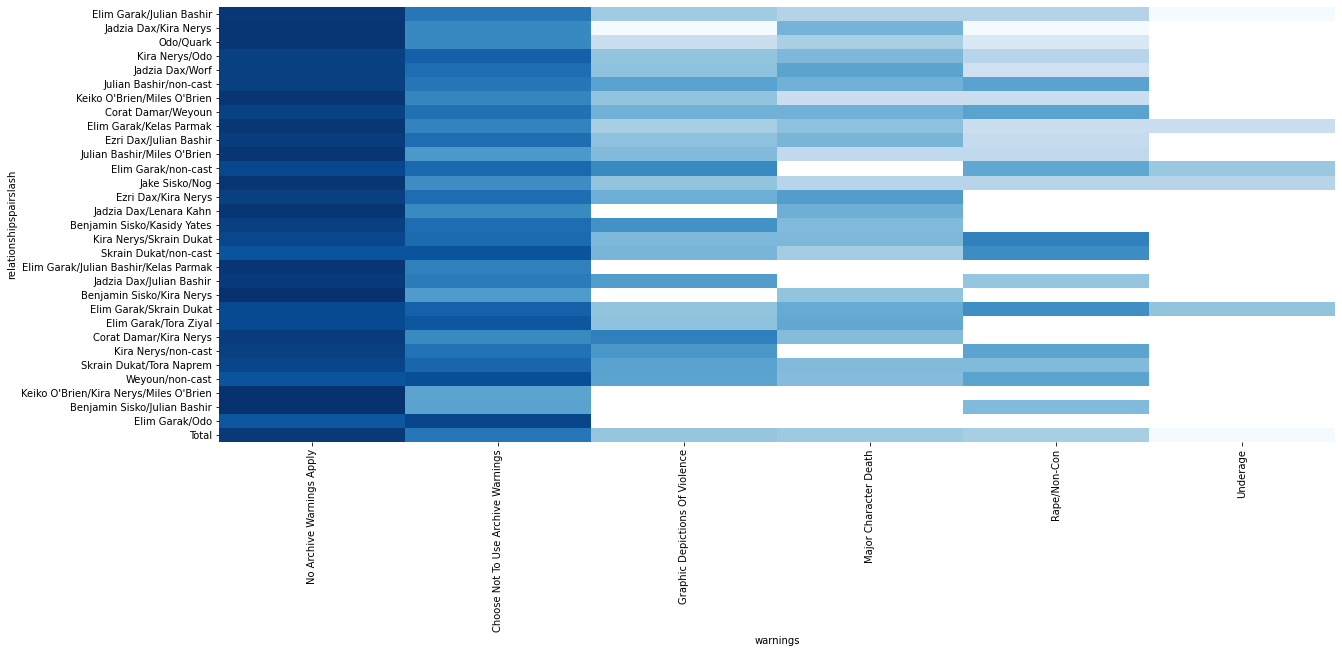

In [14]:
fig, ax = plt.subplots(figsize = (20,8))
cmap = sns.color_palette('Blues', n_colors=100)
hm = sns.heatmap(data=crosstab_relationshipspairslash_warnings_percent, vmin=0, vmax=2, norm=LogNorm(), cmap=cmap, cbar=False)
fig = hm.get_figure()
plt.xticks(rotation=90)
fig.savefig('top30cat-relationshipspairslash-warnings-heatmap.pdf', orientation='landscape')
fig.savefig('top30cat-relationshipspairslash-warnings-heatmap.png')
fig.savefig('top30cat-relationshipspairslash-warnings-heatmap.svg')
plt.show()